In [70]:
import pandas as pd

In [71]:
data =pd.read_csv("/content/FuelConsumption.csv")
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [72]:
import torch

In [73]:
X= data['ENGINESIZE'].values
X[:5]

array([2. , 2.4, 1.5, 3.5, 3.5])

In [74]:
X.shape

(1067,)

In [75]:
y = data['CO2EMISSIONS'].values
y.shape

(1067,)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
import torch

In [92]:
X1= torch.from_numpy(X).type(torch.float).reshape(-1, 1)
y1 =torch.from_numpy(y).type(torch.float).reshape(-1, 1)

In [93]:
X_train,X_test,Y_train,Y_test =train_test_split(X1,y1, test_size=0.2,random_state=42)

In [94]:
X_train[:5]

tensor([[1.4000],
        [4.4000],
        [3.0000],
        [3.0000],
        [5.3000]])

In [95]:
X_train.dtype

torch.float32

In [96]:
import matplotlib.pyplot as plt

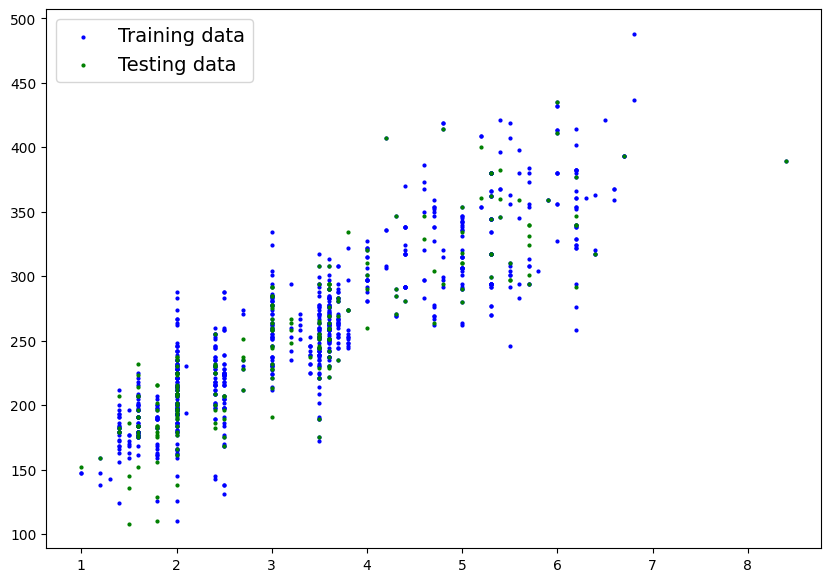

In [97]:
# Plot the training and testing data
def plot_predictions(training_data=X_train,training_label=Y_train,testing_data=X_test,testing_label=Y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(training_data,training_label,s=4,c="b",label="Training data")
  plt.scatter(testing_data,testing_label,s=4,c="g",label="Testing data")
  if predictions is not None:
    plt.scatter(testing_data,predictions,s=4,c="r",label="Predictions")
  plt.legend(prop={"size":14});
plot_predictions();


In [98]:
from torch import nn

In [99]:
# Create PyTorch linear regression model by subclassing nn.Module
#create linear regression model class
class LinearRegression_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          dtype=torch.float,
                                          requires_grad=True))
    self.bias=nn.Parameter(torch.randn(1,
                                       dtype=torch.float,
                                       requires_grad=True))

    #forward method to define the computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor: #x is the input value
    return self.weights*x+self.bias #this is the linear regression formula


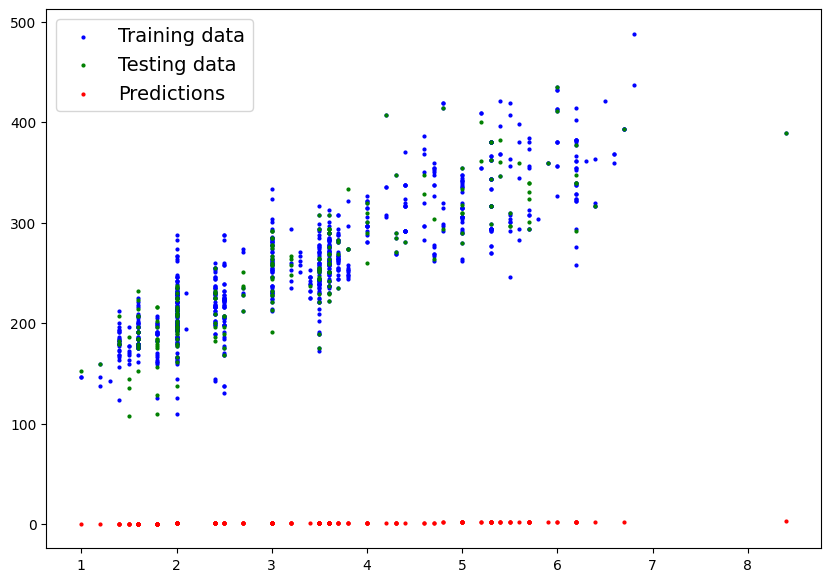

In [100]:
# Instantiate the model and put it to the target device
torch.manual_seed(42)
model_0= LinearRegression_Model()
list(model_0.parameters())
with torch.inference_mode():
  y_pred=model_0(X_test)
plot_predictions(predictions=y_pred)



In [101]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [102]:
# Create the loss function and optimizer
loss_fn= nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [110]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs=10000


# Send data to target device
training_loss=[]
testing_loss=[]
epoch_count=[]


for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()


  # 1. Forward pass
  y_pred=model_0(X_train)




  # 2. Calculate loss
  loss=loss_fn(y_pred,Y_train)



  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()


  # 5. Step the optimizer
  optimizer.step()


  ### Perform testing every 20 epochs


    # Put model in evaluation mode and setup inference context
  model_0.eval()
  with torch.inference_mode():

      # 1. Forward pass
      test_pred=model_0(X_test)

      # 2. Calculate test loss
  test_loss=loss_fn(test_pred,Y_test)
  epoch_count.append(epoch)
  training_loss.append(loss)
  testing_loss.append(test_loss)

      # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Streaming output truncated to the last 5000 lines.
Epoch: 5000 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5001 | Train loss: 23.131 | Test loss: 23.921
Epoch: 5002 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5003 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5004 | Train loss: 23.131 | Test loss: 23.921
Epoch: 5005 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5006 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5007 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5008 | Train loss: 23.131 | Test loss: 23.921
Epoch: 5009 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5010 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5011 | Train loss: 23.131 | Test loss: 23.921
Epoch: 5012 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5013 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5014 | Train loss: 23.131 | Test loss: 23.921
Epoch: 5015 | Train loss: 23.131 | Test loss: 23.922
Epoch: 5016 | Train loss: 23.131 | Test loss: 23.921
Epoch: 5017 | Train loss: 23.131 | Test loss: 23

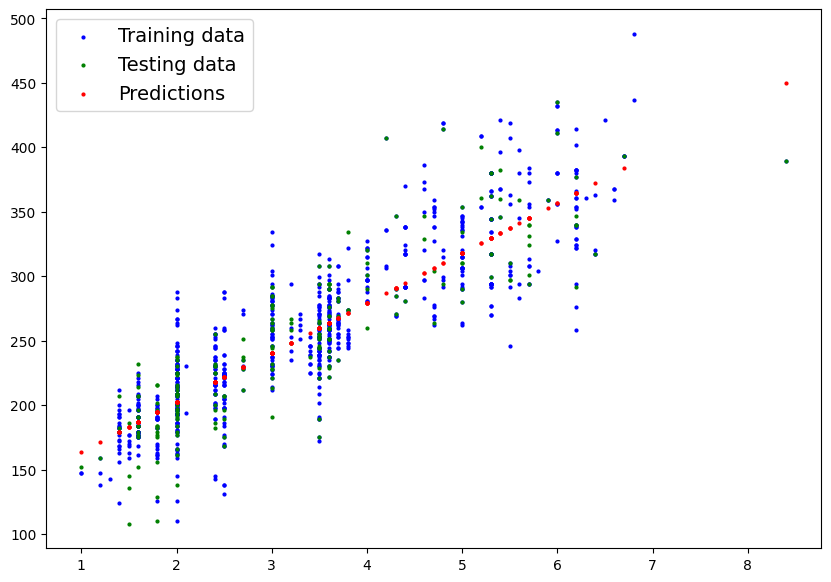

In [111]:
# Make predictions with the model
plot_predictions(predictions=test_pred)


In [112]:
def r_squared(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    ss_tot = torch.sum((y_true - y_true_mean) ** 2)
    ss_res = torch.sum((y_true - y_pred) ** 2)
    return 1 - ss_res / ss_tot

# Calculate R-squared
with torch.inference_mode():
    final_predictions = model_0(X_test)
    r2_score = r_squared(Y_test, final_predictions)

print(f"R-squared: {r2_score.item()}")


R-squared: 0.7630606293678284


In [114]:
import numpy as np

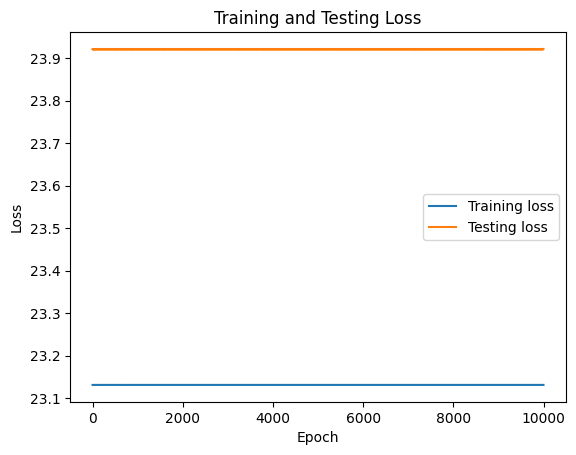

In [116]:
# Plot the predictions (these may need to be on a specific device)
plt.plot(epoch_count,np.array(torch.tensor(training_loss)),label="Training loss")
plt.plot(epoch_count,testing_loss,label="Testing loss")
plt.title("Training and Testing Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
